<a href="https://colab.research.google.com/github/tigerak/1st_practice/blob/main/M7_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블 (Ensemble)

- 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측값을 결합하는 방법
- 앙상블에는 크게 두 가지 종류가 존재
 - 평균 방법
   - 여러개의 추정값을 독립적으로 구한 뒤 평균을 취함
   - 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
 - 부스팅 방법
   - 순차적으로 모델 생성
   - 결합된 모델의 편향을 감소시키기 위해 노력
   - 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구죽하는 것

# Bagging meta-estimator

- bagging은 boostrap aggregation의 줄임말
- 원래 훈련 데이터셋의 일부를 사용해 여러 보델을 훈련
- 각각의 결과를 결합해 최종 결과를 생성
- 분산을 줄이고 과적합을 막음
- 강력하고 복잡한 모델에서 잘 동작

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston, load_diabetes

## Bagging을 사용한 분류 

In [3]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

### KNN

IRIS

In [4]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.0013569355010986327 (+/- 0.0006599066840289974)
avg score time : 0.0019580364227294923 (+/- 0.00017643442663228226)
avg test score : 0.96 (+/- 0.024944382578492935) 

avg fit time : 0.01873302459716797 (+/- 0.0023559609283250733)
avg score time : 0.00794234275817871 (+/- 0.0015248042330590838)
avg test score : 0.96 (+/- 0.024944382578492935)


Wine

In [5]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.0011846065521240235 (+/- 0.00010731215742898881)
avg score time : 0.0024715423583984374 (+/- 0.0004085066633823608)
avg test score : 0.9493650793650794 (+/- 0.037910929811115976) 

avg fit time : 0.021405982971191406 (+/- 0.003322328957766521)
avg score time : 0.008663749694824219 (+/- 0.0013478825763269641)
avg test score : 0.9550793650793651 (+/- 0.0136876578649588)


유방암

In [6]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.002217721939086914 (+/- 0.00032475731121355493)
avg score time : 0.00821218490600586 (+/- 0.0015096546845571597)
avg test score : 0.9648501785437045 (+/- 0.009609970350036127) 

avg fit time : 0.02150716781616211 (+/- 0.0011753178733533867)
avg score time : 0.016029930114746092 (+/- 0.0011067425737238414)
avg test score : 0.9595714951094549 (+/- 0.008977387313188354)


### SVC

IRIS

In [7]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.0013090610504150391 (+/- 0.00011554528871148655)
avg score time : 0.00044403076171875 (+/- 1.74685178210787e-05)
avg test score : 0.9666666666666666 (+/- 0.02108185106778919) 

avg fit time : 0.028034353256225587 (+/- 0.004213109056330598)
avg score time : 0.003992557525634766 (+/- 0.0010367724502222842)
avg test score : 0.9466666666666667 (+/- 0.039999999999999994)


Wine

In [8]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.0027700424194335937 (+/- 0.0009626228429635313)
avg score time : 0.0007078170776367188 (+/- 0.00016707358808462362)
avg test score : 0.9833333333333334 (+/- 0.022222222222222233) 

avg fit time : 0.025763845443725585 (+/- 0.0016856613558617643)
avg score time : 0.0033382892608642576 (+/- 0.00020892425144630787)
avg test score : 0.9666666666666666 (+/- 0.03239417719358502)


유방암

In [9]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.0058194160461425785 (+/- 0.0002826824680554752)
avg score time : 0.0013616561889648437 (+/- 3.683683554032135e-05)
avg test score : 0.9736376339077782 (+/- 0.014678541667933545) 

avg fit time : 0.041098833084106445 (+/- 0.0038436323311407273)
avg score time : 0.008606338500976562 (+/- 0.0012365826730052478)
avg test score : 0.9683434249340165 (+/- 0.009052920655894164)


### Decision Tree

In [10]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.0010446548461914063 (+/- 0.00013389164559298141)
avg score time : 0.0003577232360839844 (+/- 3.2732222672911107e-05)
avg test score : 0.9666666666666668 (+/- 0.036514837167011066) 

avg fit time : 0.025361919403076173 (+/- 0.0028294390809316017)
avg score time : 0.002446413040161133 (+/- 0.0002639348159613519)
avg test score : 0.9466666666666667 (+/- 0.039999999999999994)


Wine

In [11]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.0014900684356689454 (+/- 5.4923154586065366e-05)
avg score time : 0.0003902435302734375 (+/- 3.1098192048891146e-05)
avg test score : 0.8931746031746032 (+/- 0.03292110942395786) 

avg fit time : 0.027842044830322266 (+/- 0.0026520330680270075)
avg score time : 0.0026184558868408204 (+/- 0.0005183497055631587)
avg test score : 0.9665079365079364 (+/- 0.027185986341561497)


유방암

In [12]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.008511495590209962 (+/- 0.0007475985115762645)
avg score time : 0.0006674289703369141 (+/- 3.985360353671522e-05)
avg test score : 0.9226517621487347 (+/- 0.01710803151417206) 

avg fit time : 0.03709421157836914 (+/- 0.0015386200321798262)
avg score time : 0.003125572204589844 (+/- 0.000764073506559832)
avg test score : 0.9596180717279925 (+/- 0.02515211194173173)


## Bagging을 사용한 회귀

In [13]:
boston = load_boston()
diabetes = load_diabetes()

### KNN

Boston

In [14]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.0013627052307128907 (+/- 0.0001436494870616174)
avg score time : 0.0018210411071777344 (+/- 0.0002787945388997404)
avg test score : 0.47357748833823543 (+/- 0.13243123464477455) 

avg fit time : 0.020848464965820313 (+/- 0.0042851995267428975)
avg score time : 0.010248756408691407 (+/- 0.0005936611052965287)
avg test score : 0.46322055141652 (+/- 0.14301163536280398)


당뇨병

In [15]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.0018449783325195312 (+/- 0.0005707684136590009)
avg score time : 0.0026385307312011717 (+/- 0.0009504056753166896)
avg test score : 0.3689720650295623 (+/- 0.044659049060165365) 

avg fit time : 0.020511436462402343 (+/- 0.004191575221311098)
avg score time : 0.009977054595947266 (+/- 0.0023003643965786216)
avg test score : 0.4063715757832001 (+/- 0.051061403443893316)


### SVR

Boston

In [16]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.01590132713317871 (+/- 0.001731482301132113)
avg score time : 0.0024609088897705076 (+/- 0.0001986608786323141)
avg test score : 0.17631266230186618 (+/- 0.5224914915128981) 

avg fit time : 0.054573774337768555 (+/- 0.002677108182672872)
avg score time : 0.009816122055053712 (+/- 0.001581477211689305)
avg test score : 0.17280624102095543 (+/- 0.2791568903772702)


당뇨병

In [17]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.011996746063232422 (+/- 0.002555966036437913)
avg score time : 0.0022284984588623047 (+/- 0.0004844114739730082)
avg test score : 0.14659936199629434 (+/- 0.02190798003342928) 

avg fit time : 0.04135355949401855 (+/- 0.0022287021376351185)
avg score time : 0.008969449996948242 (+/- 0.002161074555332194)
avg test score : 0.0643630398444319 (+/- 0.016961107827121756)


### Decision Tree

Boston

In [18]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.005427837371826172 (+/- 0.0021195575329435255)
avg score time : 0.0011219501495361329 (+/- 0.0007021321407616349)
avg test score : 0.17739646427102435 (+/- 0.8342835898148999) 

avg fit time : 0.033829021453857425 (+/- 0.001739649516725257)
avg score time : 0.0030936717987060545 (+/- 0.0005543738905993753)
avg test score : 0.36999273710904823 (+/- 0.34094739913071953)


당뇨

In [19]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(
    base_model,
    n_estimators = 10,
    max_samples = 0.5,
    max_features = 0.5
)

cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()), '\n')

cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.0042613506317138675 (+/- 0.0012394618184912798)
avg score time : 0.0009167194366455078 (+/- 0.00030192081012351277)
avg test score : -0.15855524075456534 (+/- 0.14541194779790334) 

avg fit time : 0.026056766510009766 (+/- 0.00042951322415246153)
avg score time : 0.003144693374633789 (+/- 0.0014006651356050978)
avg test score : 0.3411712311029837 (+/- 0.09302699887924354)


# Forests of Randomized Trees

- sklearn.ensemble 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
 - Random Forest
 - Extra-Trees
- 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
- 앙상블 모델의 예측은 각 모델의 평균

In [20]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

## Random Forests 분류

In [21]:
base_model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.1413325309753418 (+/- 0.011509449746150731)
avg score time : 0.009014558792114259 (+/- 0.0016733028033949597)
avg test score : 0.96 (+/- 0.024944382578492935)


In [22]:
base_model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.1416374683380127 (+/- 0.004545409452504231)
avg score time : 0.008700847625732422 (+/- 0.0009754049133727991)
avg test score : 0.9776190476190475 (+/- 0.020831783767013237)


In [23]:
base_model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.2107363224029541 (+/- 0.0062314433510640005)
avg score time : 0.010260963439941406 (+/- 0.0021110586323828274)
avg test score : 0.956078248719143 (+/- 0.02351473018484404)


## Random Forests 회귀

In [24]:
base_model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.33829665184020996 (+/- 0.02596276085612155)
avg score time : 0.008044624328613281 (+/- 0.00023767759572246357)
avg test score : 0.6182427894412074 (+/- 0.21759872326650953)


In [25]:
base_model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.26899161338806155 (+/- 0.007843355678764796)
avg score time : 0.008963584899902344 (+/- 0.0017825379886964162)
avg test score : 0.4231308587488118 (+/- 0.04937044447669471)


## Extremely Randomized Trees 분류

In [26]:
base_model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.09603648185729981 (+/- 0.0032121458844913847)
avg score time : 0.008231496810913086 (+/- 0.00029829694003905943)
avg test score : 0.9533333333333334 (+/- 0.03399346342395189)


In [27]:
base_model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.105861234664917 (+/- 0.005215125099006376)
avg score time : 0.008751296997070312 (+/- 0.00046087702854973517)
avg test score : 0.9888888888888889 (+/- 0.013608276348795441)


In [28]:
base_model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.11891298294067383 (+/- 0.00472026750446203)
avg score time : 0.009669828414916991 (+/- 0.0004960932624633925)
avg test score : 0.9630957925787922 (+/- 0.01288419615469956)


## Extremely Randomized Trees 회귀

In [29]:
base_model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.19397969245910646 (+/- 0.013467070042627552)
avg score time : 0.008222818374633789 (+/- 0.00027165656049355706)
avg test score : 0.6170276734744511 (+/- 0.26634966499467844)


In [30]:
base_model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.16882247924804689 (+/- 0.004728490828494131)
avg score time : 0.009248495101928711 (+/- 0.0012428365322791016)
avg test score : 0.44112325131796837 (+/- 0.024381890737223952)


## Random Forest, Extra Tree 시각화

- 결정 트리, 랜덤 포레스트, 익스트라 트리의 결정 경계와 회귀식 시각화

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [32]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [33]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

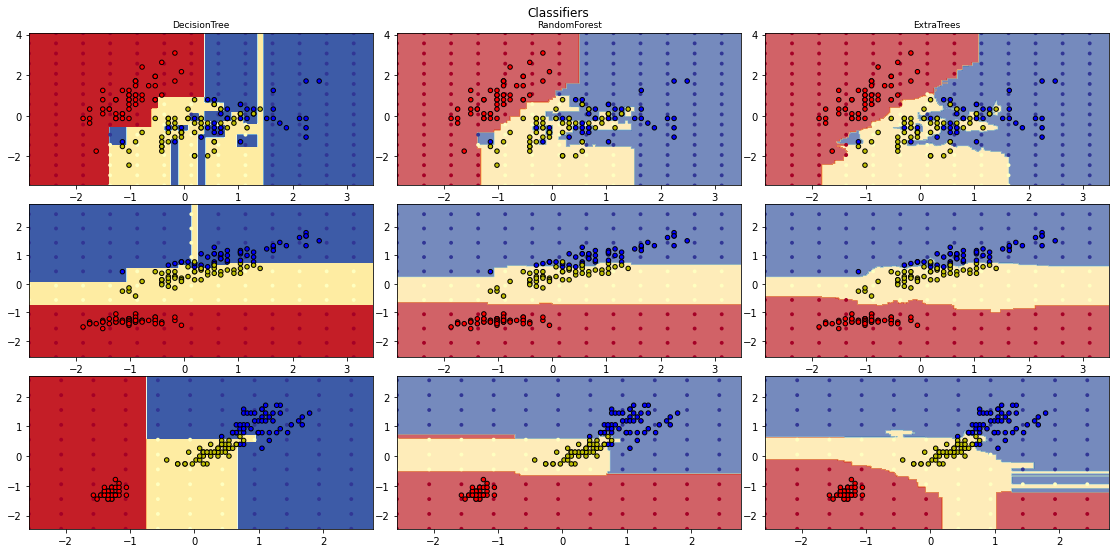

In [34]:
plt.figure(figsize=(16, 8))

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        X = iris.data[:, pair]
        y = iris.target

        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) /  std

        model.fit(X, y)

        model_title = str(type(model)).split('.')[-1][:-2][:-len('Classifier')]

        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
        y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                             np.arange(y_min, y_max, plot_step_coarser))
        Z_point_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                              yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_point_coarser, cmap=cmap,
                                edgecolor='none')
        
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1

plt.suptitle('Classifiers',fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5);

In [35]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

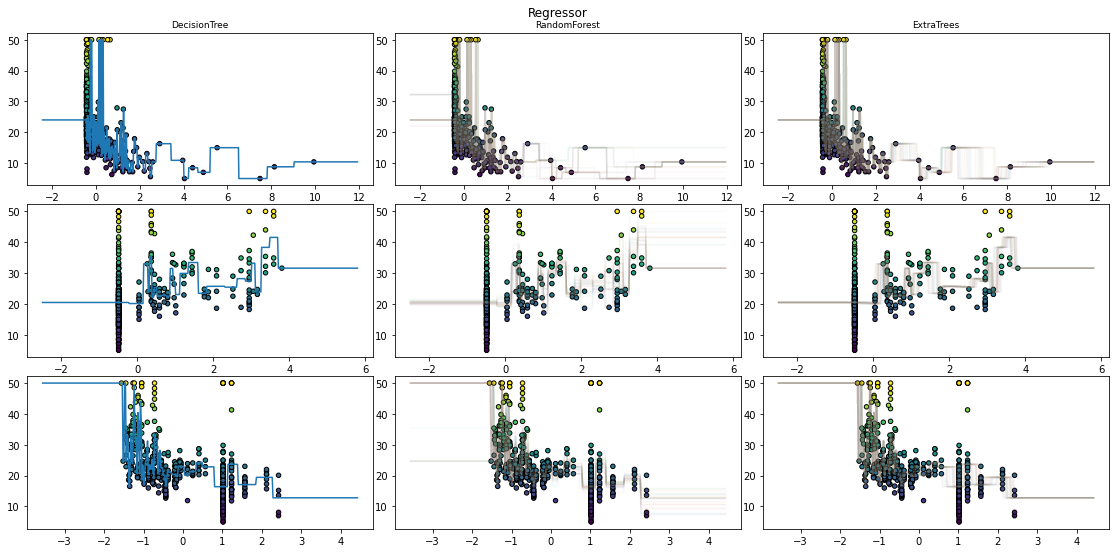

In [36]:
plt.figure(figsize=(16, 8))

for pair in (0, 1, 2):
    for model in models:
        X = boston.data[:, pair]
        y = boston.target

        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) /  std

        model.fit(X.reshape(-1, 1), y)

        model_title = str(type(model)).split('.')[-1][:-2][:-len('Regressor')]

        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max = X.min()-1, X.max()+1
        y_min, y_max = y.min()-1, y.max()+1
        xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)
        
        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1, 1))
            cs = plt.plot(xx, Z)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1, 1))
                cs = plt.plot(xx, Z, alpha=estimator_alpha)


        
        plt.scatter(X, y, c=y,
                    edgecolor='k', s=20)
        plot_idx += 1

plt.suptitle('Regressor',fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5);

# AdaBoost
- 대표적인 부스팅 알고리즘
- 일련의 약한 모델들을 학습
- 수정된 버전의 데이터를 반복 학습(가중칙 적용된)
- 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
- 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
 - 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소소
 - 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

In [37]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

In [38]:
base_model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.07572669982910156 (+/- 0.014152889001587949)
avg score time : 0.00733489990234375 (+/- 0.0017670783371091538)
avg test score : 0.9466666666666667 (+/- 0.03399346342395189)


In [39]:
base_model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.07369537353515625 (+/- 0.0011177086423256948)
avg score time : 0.007451677322387695 (+/- 0.001627477400500979)
avg test score : 0.8085714285714285 (+/- 0.16822356718459935)


In [40]:
base_model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.15438528060913087 (+/- 0.005002546599724156)
avg score time : 0.007664775848388672 (+/- 0.00028785765502739894)
avg test score : 0.9701133364384411 (+/- 0.019709915473893072)


AdaBoost 회귀

In [41]:
base_model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.09915285110473633 (+/- 0.006554804511218552)
avg score time : 0.004142332077026367 (+/- 0.0001556973286175299)
avg test score : 0.5985744583807469 (+/- 0.20937548598257683)


In [42]:
base_model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.08491997718811035 (+/- 0.011801769011230572)
avg score time : 0.004174375534057617 (+/- 0.000795953712946398)
avg test score : 0.41312084500745616 (+/- 0.04091835944493939)


# Gradient Tree Boosting
- 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
- 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [43]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [44]:
base_model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.19443154335021973 (+/- 0.01920054713762424)
avg score time : 0.0011326789855957032 (+/- 0.00020473953902250565)
avg test score : 0.96 (+/- 0.024944382578492935)


In [45]:
base_model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.24030179977416993 (+/- 0.01114046237161834)
avg score time : 0.0010747909545898438 (+/- 0.00013169159799846585)
avg test score : 0.9330158730158731 (+/- 0.04127777701479872)


In [46]:
base_model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.43199381828308103 (+/- 0.006276385214188065)
avg score time : 0.00126495361328125 (+/- 0.0004092241272487921)
avg test score : 0.9596180717279925 (+/- 0.02453263202329889)


In [47]:
base_model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.12228121757507324 (+/- 0.0039129997542069524)
avg score time : 0.0010137081146240235 (+/- 6.305680589377684e-05)
avg test score : 0.6752372690883461 (+/- 0.16121836382662494)


In [48]:
base_model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.09624361991882324 (+/- 0.004325349797776207)
avg score time : 0.0010033607482910155 (+/- 1.7014201968570415e-05)
avg test score : 0.4029450867301339 (+/- 0.0688801507855847)


# 투표 기반 분류 (Voting Classtier)

- 서로 다른 모델들의 결과를 투표를 통해 결합
- 두가지 방법으로 투표 가능
 - 가장 많이 예측된 클래스를 정답으로 채택(hard noting)
 - 예측된 확률의 가중치 평균(soft voting)

In [49]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score

In [50]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc', model1), ('naive', model2), ('forest', model3)],
    voting='hard'
)

for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy : %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy : 0.97 (+/- 0.02) [SVC]
Accuracy : 0.95 (+/- 0.03) [GaussianNB]
Accuracy : 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy : 0.97 (+/- 0.02) [VotingClassifier]


In [51]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc', model1), ('naive', model2), ('forest', model3)],
    voting='soft',
    weights=[2, 1, 2]
)

for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy : %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy : 0.97 (+/- 0.02) [SVC]
Accuracy : 0.95 (+/- 0.03) [GaussianNB]
Accuracy : 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy : 0.96 (+/- 0.02) [VotingClassifier]


결정 경계 시각화

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [53]:
X = iris.data[:, [0, 2]]
y = iris.target

model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(
    estimators = [('dt', model1), ('knn', model2), ('svc', model3)],
    voting='soft',
    weights=[2, 1, 2]
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

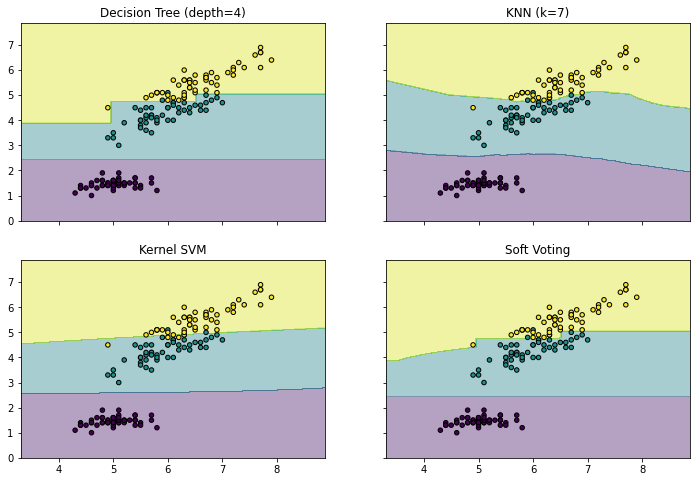

In [54]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)',
                           'Kernel SVM', 'Soft Voting']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt);

투표 기반 회귀

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor

In [56]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights = [1, 1, 1]
)

for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, boston.data, boston.target, cv=5)
    print('Accuracy : %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy : 0.35 (+/- 0.38) [LinearRegression]
Accuracy : 0.67 (+/- 0.16) [GradientBoostingRegressor]
Accuracy : 0.63 (+/- 0.21) [RandomForestRegressor]
Accuracy : 0.66 (+/- 0.20) [VotingRegressor]


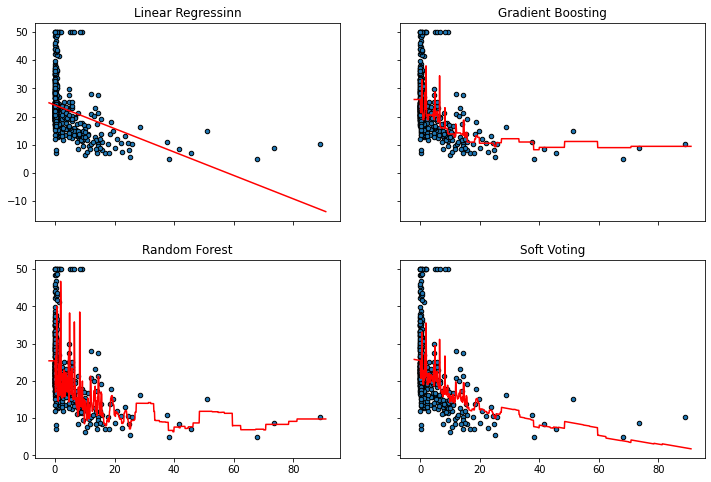

In [57]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights = [1, 1, 1]
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regressinn', 'Gradient Boosting',
                           'Random Forest', 'Soft Voting']):
    Z = model.predict(np.c_[xx.reshape(-1, 1)])

    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt);

# 스텍 일반화 (Stacked Generalization)

- 각 모델의 예측 값을 최종 모델의 입력으로 사용
- 모델의 편향을 줄이는데 효과적

스택 회귀

In [58]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor

In [59]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators=estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

cross_val = cross_validate(
    estimator = reg,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.16293573379516602 (+/- 0.003668471812716938)
avg score time : 0.0025070667266845702 (+/- 3.777188430200663e-05)
avg test score : 0.36959040300841 (+/- 0.07034531226129913)


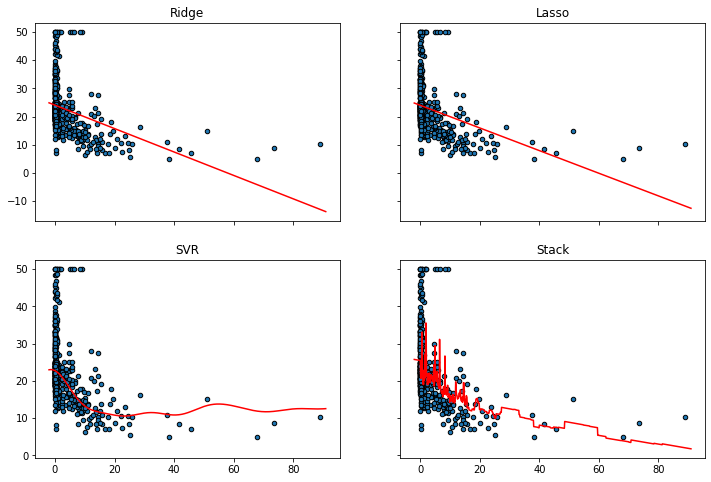

In [60]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators=estimators,
        final_estimator = GradientBoostingRegressor()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso',
                           'SVR', 'Stack']):
    Z = model.predict(np.c_[xx.reshape(-1, 1)])

    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt);

스텍 분류

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier

In [64]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
               ('svc', SVC(),
                'naive', GaussianNB)]

clf = StackingClassifier(
        estimators=estimators,
        final_estimator = RandomForestClassifier()
)

cross_val = cross_validate(
    estimator = clf,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), 
                                          cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), 
                                          cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), 
                                          cross_val['test_score'].std()))

avg fit time : 0.3277857780456543 (+/- 0.03349018146974281)
avg score time : 0.0089935302734375 (+/- 0.0006892938767417202)
avg test score : 0.9733333333333334 (+/- 0.02494438257849294)


In [65]:
X = iris.data[:, [0, 2]]
y = iris.target

model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
        estimators=estimators,
        final_estimator = RandomForestClassifier()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

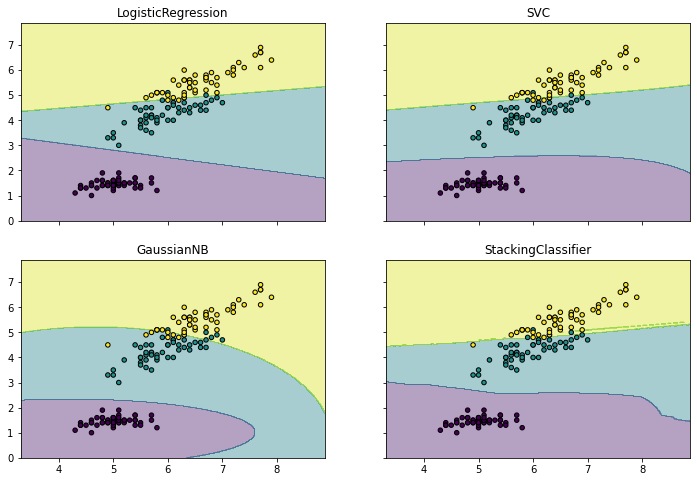

In [66]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, stack],
                          ['LogisticRegression', 'SVC',
                           'GaussianNB', 'StackingClassifier']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt);